# Simulacija Monty Hall problema
## *Odlučivanje, pristrasnost i simulacije*
### Srđan Verbić, 2018-05-12 
(deo predavanja održanog na Ekonomskom fakultetu u Sarajevu)

*Monty Hall problem je čuveni primer iracionalne pristrasnosti u odlučivanju. Uprkos matematičkim dokazima da prvobitni izbor nije najbolje rešenje, većini ljudi je teško da prihvate takvu argumentaciju. Ovde smo pokušali da demonstriramo koje je rešenje bolje koristeći računarsku simulaciju u Python-u. **Jupyter** platforma, na kojoj je pisan ovaj blog, omogućava vam da simulaciju pokrećete sami. Obeležite prvo polje u kom je kôd i pritisnite istovremeno **Shift** i **Return** pa onda redom za svako naredno polje.*

Šestdesetih godina prošlog veka na američkoj televiziji prikazivao se šou pod nazivom "Let's Make a Deal" koji je vodio Monty Hall. Najzanimljiviji deo programa je bio kada takmičari dobijaju priliku da uz malo sreće osvoje automobil. 
Takmičar je, na početku, video troja zatvorena vrata. Rečeno mu je da je automobil iza jednih, a koza iza dvoja vrata. Onda takmičar bira jedna od tih vrata.
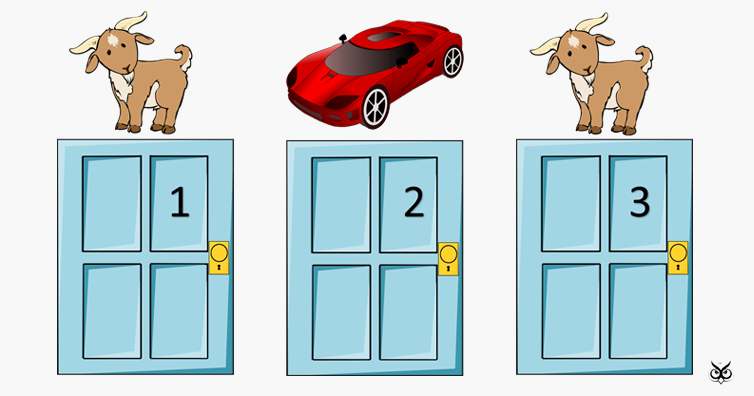(ilustracija preuzeta sa sajta https://theuijunkie.com/monty-hall-problem-explained/)

Šanse da takmičar iz prve pogodi iza kojih je vrata aumobil je 1/3.
Nakon toga Monty Hall otvara jedna od dvoja vrata koja takmičar nije izabrao, a iza kojih se nalazi koza. Tada takmičaru i svima u studiju pokazuje da iza tih vrata definitivno nije automobil.
Da bismo simulirali tu situaciju napisali smo kratak program koji iza vrata rasporedi jedan auto i dve koze.

In [1]:
# Monty Hall simulacija

# (setite se: Shift + Return...)

import numpy as np
import random as rd
import pandas as pd

# Vrata označavamo sa 1, 2 i 3
vrata=['1','2','3']
print(vrata)

iza_vrata=['auto','koza 1','koza 2']
rd.shuffle(iza_vrata)

['1', '2', '3']


Mogli bismo odmah da prikažemo šta je u "pretumbanoj" promenljivoj **iza_vrata**, ali nećemo. Prvo izaberite vrata.

In [2]:
# Izaberi jedna od troja vrata. 
izbor_vrata=int(input('Izaberi oznaku vrata (1/2/3): '))
vrata[izbor_vrata-1]='x' 
# Ova komplikacija sa "-1" je zbog toga što Python indeksira niz počevši od nule. Da sam ovo pisao u R-u, toga ne bi bilo. :-/

print('Izabrana vrata br. %d su označena sa x.' % izbor_vrata)
print(vrata)

Izaberi oznaku vrata (1/2/3): 1
Izabrana vrata br. 1 su označena sa x.
['x', '2', '3']


In [3]:
# Šta je iza izabranih vrata?
dobitak=iza_vrata[izbor_vrata-1]
dobitak

# Ovo i dalje ne vidi takmičar. Samo demonstriramo šta radi Monty Hall.

'auto'

In [4]:
# Šta će onda Monty Hall da pokaže?
if dobitak=='koza 1':
    montijev_izbor='koza 2'
    preostalo='auto'
elif dobitak=='koza 2':
    montijev_izbor='koza 1'
    preostalo='auto'
else:
    montijev_izbor=np.random.choice(['koza 1','koza 2'])
    preostalo='koza 1'
    if montijev_izbor=='koza 1': preostalo='koza 2'
montijev_izbor

'koza 2'

In [5]:
# Šta sad vidimo?
vrata[iza_vrata.index(montijev_izbor)]=montijev_izbor
vrata

['x', 'koza 2', '3']

Sad sledi ključni momenat. Izabrali ste vrata koja su sad označena sa x. I dalje ne znamo šta je iza njih. Monty Hall je otvorio jedna vrata iza kojih nije automobil. On Vam sad daje priliku da se predomislite i izaberete druga neotvorena vrata. Hoćete li to učiniti? 

In [6]:
# Hoćeš li sad da promeniš izbor?
menjas=input('Želiš li da promeniš izbor vrata (d/n) ? ')
konacni_izbor=izbor_vrata
if menjas=='d': konacni_izbor=iza_vrata.index(preostalo)+1
print('Tvoj konačni izbor su vrata br.',konacni_izbor)

Želiš li da promeniš izbor vrata (d/n) ? n
Tvoj konačni izbor su vrata br. 1


In [7]:
print('Raspored dobitaka iza vrata je: ', iza_vrata)
print('Tvoj dobitak je',iza_vrata[konacni_izbor-1])

Raspored dobitaka iza vrata je:  ['auto', 'koza 2', 'koza 1']
Tvoj dobitak je auto


Mudrije rešenje je da promenite prvobitni izbor. Zašto? Zato što se verovatnoća da ste imali sreće sa prvim izborom nije promenila time što je Monty Hall otvorio jedna vrata i pokazao kozu. Šta god da smo izabrali, on bi otvorio neka druga vrata i pokazao kozu. Verovatnoća prvobitnog izbora je i dalje 1/3, a pošto sad definitivno znamo iza kojih vrata automobil nije, ostaju nam ona treća vrata iza kojih je automobil sa verovatnoćom 2/3. Prosto, zbir verovatnoća da se automobil nalazi iza jednih od troja vrata mora da bude jedan.

Niste ubeđeni? Možda je bolje da napravimo simulaciju i ponovimo izbor 200 puta pa da vidimo ko bolje prolazi: onaj ko menja ili onaj ko ostaje pri prvobitnom izboru.

## Simulacija ishoda

In [8]:
df=pd.DataFrame(columns=['vrata 1','vrata 2','vrata 3','izbor vrata','ishod','pokazi','preostalo'])
broj_ponavljanja=200
for i in range(broj_ponavljanja):
    iza_vrata=['auto','koza 1', 'koza 2']
    rd.shuffle(iza_vrata)
    izbor_vrata=np.random.choice(range(3))+1
    ishod=iza_vrata[izbor_vrata-1]
    if ishod=='koza 1':
        pokazi='koza 2'
        preostalo='auto'
    elif ishod=='koza 2':
        pokazi='koza 1'
        preostalo='auto'
    else:
        pokazi=np.random.choice(['koza 1','koza 2'])
        preostalo='koza 1'
        if pokazi=='koza 1': alternativa='koza 2'
    vrsta={'vrata 1':[iza_vrata[0]],'vrata 2':[iza_vrata[1]],'vrata 3':[iza_vrata[2]],'izbor vrata':[izbor_vrata],
           'ishod':[ishod],'pokazi':[pokazi],'preostalo':[preostalo]}
    df_vrsta = pd.DataFrame(data=vrsta,
                      columns=['vrata 1', 'vrata 2', 'vrata 3', 'izbor vrata', 'ishod','pokazi','preostalo'])
    df=df.append(df_vrsta,ignore_index=True)

Rezultate svih 200 simulacija smo spakovali u "data frame" strukturu i možemo da vidimo šta je bilo iza vrata, koja je vrata prvobitno izabrao računar, šta je bilo iza tih vrata, šta je pokazao Monty Hall i šta je preostalo, tj. bilo iza onih trećih vrata.


In [9]:
# Prikazujemo podatke za prvih pet simulacija
df.head()

,vrata 1,vrata 2,vrata 3,izbor vrata,ishod,pokazi,preostalo
0,koza 2,auto,koza 1,3,koza 1,koza 2,auto
1,koza 2,koza 1,auto,3,auto,koza 1,koza 1
2,auto,koza 2,koza 1,3,koza 1,koza 2,auto
3,koza 2,auto,koza 1,1,koza 2,koza 1,auto
4,auto,koza 2,koza 1,3,koza 1,koza 2,auto


Da se ne bismo ubeđivali šta je bolji izbor gledajući tabelu, bolje je da grafički prikažemo ishode. 

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

ishod=df.ishod=='auto' # da li je auto iza provobitno odabranih vrata
preostalo=df.preostalo=='auto' # da li je auto iza onih drugih vrata

U promenljivama ishod i preostalo su nizovi True ili False vrednosti u zavisnosti od toga da li je iza odgovarajućih vrata bio automobil ili ne.

In [11]:
intishod = [int(i) for i in ishod] # samo T/F pretvaramo u 1/0
intpreostalo = [int(i) for i in preostalo]

verovatnoca1=np.cumsum(intishod) # cumsum kumulativno prebrojava pozitivne ishode za prvobitni
verovatnoca2=np.cumsum(intpreostalo) # i za promenjeni izbor vrata

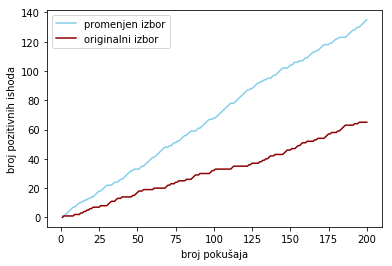

In [12]:
plt.plot(np.arange(1,broj_ponavljanja+1,1),verovatnoca2,color="skyblue",label='promenjen izbor')
plt.plot(np.arange(1,broj_ponavljanja+1,1),verovatnoca1,color="darkred",label='originalni izbor')
plt.ylabel('broj pozitivnih ishoda')
plt.xlabel('broj pokušaja')
plt.legend();

Kad simulaciju ponovimo dovoljno puta vidimo da je verovatnoća pozitivnog ishoda dva puta veća ako promenimo prvobitni izbor. I dalje niste ubeđeni? Ili se i dalje lomite? Svejedno, računarske simulacije ne pate od te vrste pristrasnosti. Ako pristrasnost ne ubacimo u algoritam sami unoseći "ono što je očigledno" i pustimo računar da simulira sve, dobićemo nepristrasan rezultat. Računar je učinio svoje, sad je na vama odluka da li ćete da menjate izbor ili ne ako vas nekad to Monty Hall upita. 